# Regression Project 1 - Predicting fuel efficiency of vehicle  

### Problem Statement.

    The data contains MPG variable which is continous data and tells us about the efficiency of fuel consumption of a vehicle in 70s and 80s.

    Our goal here is to **predict the MPG value of a vehicle** given we have other attributes of vehicle.


## Step 1: Data Extraction.

In [2]:
# downloading data set directly using shell command   

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data


--2021-05-11 10:24:47--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.1’

auto-mpg.data.1     100%[===================>]  29.58K   118KB/s    in 0.2s    

2021-05-11 10:24:48 (118 KB/s) - ‘auto-mpg.data.1’ saved [30286/30286]



In [3]:
# importing Basic ML  libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [6]:
# reading dataset from local disc.

columns = ['mpg','cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin']

df = pd.read_csv(r'auto-mpg.data', names=columns, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
data.head()

data = df.copy()
data.sample(20) # it extract randam sample of 20 rows from data set

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
357,32.9,4,119.0,100.0,2615.0,14.8,81,3
63,14.0,8,400.0,175.0,4385.0,12.0,72,1
325,44.3,4,90.0,48.0,2085.0,21.7,80,2
186,27.0,4,101.0,83.0,2202.0,15.3,76,2
283,20.2,6,232.0,90.0,3265.0,18.2,79,1
146,28.0,4,90.0,75.0,2125.0,14.5,74,1
287,16.5,8,351.0,138.0,3955.0,13.2,79,1
231,15.5,8,400.0,190.0,4325.0,12.2,77,1
322,46.6,4,86.0,65.0,2110.0,17.9,80,3
157,15.0,8,350.0,145.0,4440.0,14.0,75,1


## Step 2: Exploratory Data Analysis
    1. check the data type of columns
    2. check the null values
    3. check the outliers
    4. Look for category distribution in catogorical column
    5. plot for correlation
    6. Look for new variables

In [7]:
# checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
# checking for null values.
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [9]:
# Summary statistics for quantitative variables.
data.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


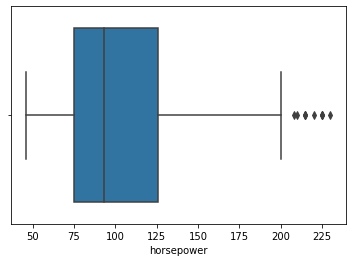

In [10]:
# to address the issue with hourse power we will use box plot just to check how many oulier are there

sns.boxplot(x=data["horsepower"])

In [11]:
# as mean is sensitive to ourliers lets impute missing values of hourse power column with median
median = data["horsepower"].median()
data['horsepower'] = data['horsepower'].fillna(median)

In [12]:
# checking categorical distribution(how many different types are available.)
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [13]:
# if you divid this with length you basically have the distribution of each category.
data['cylinders'].value_counts() / len(data['cylinders'])


4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: cylinders, dtype: float64

In [14]:
# doingsame thing from another categorical variable which is origin
data['origin'].value_counts() / len(data['origin'])


1    0.625628
3    0.198492
2    0.175879
Name: origin, dtype: float64

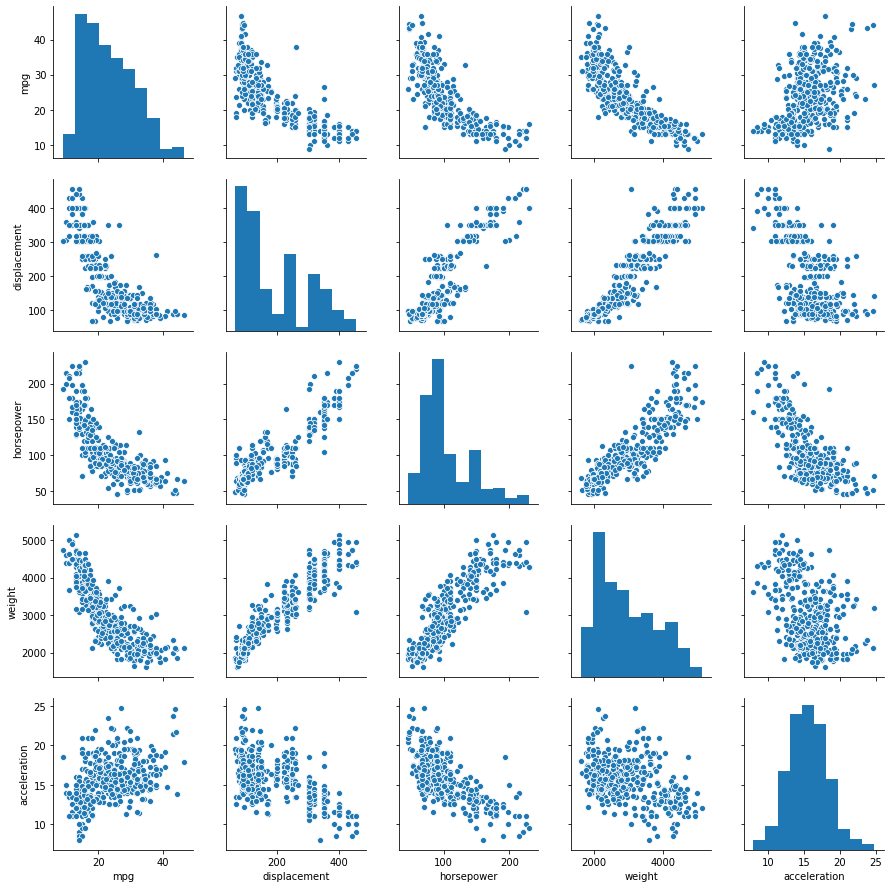

In [15]:
# we can use pair plot to get intuition of correlation of variables.
sns.pairplot(data[['mpg', 'displacement','horsepower', 'weight', 'acceleration']])

#you can skip categorical variable from plotting by seeding pairplot with numberical values only

## Step 3 : Data Preperation 
    1. Handling categorical attributes
    2. Handling missing values (imputing)
    3. Attribute addition (adding custom transformation )
    4. Setting up data transfromation pipeline for numerical and categorical data
    

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit


In [18]:
# StratifiedSuffle is preferred ensure each fold is a good representative of the whole dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

### Segregating feature and target variable.


In [46]:
data = strat_train_set.drop("mpg", axis = 1)
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


In [21]:
data_labels = strat_train_set["mpg"]
data_labels.head()

145    32.0
151    31.0
388    26.0
48     18.0
114    26.0
Name: mpg, dtype: float64

### Preprocessing Origin column

In [47]:
def preprocessing_origin_column(df):
    df["origin"] = df["origin"].map({1: "India", 2:"USA", 3:"Germany"})
    return df

In [48]:

data_tranformed = preprocessing_origin_column(data)
data_tranformed.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


### OneHot encoding Origin column

In [50]:
data_tranformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 7 columns):
cylinders       318 non-null int64
displacement    318 non-null float64
horsepower      318 non-null float64
weight          318 non-null float64
acceleration    318 non-null float64
model year      318 non-null int64
origin          318 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [53]:
# Isolating categorical variable
data_cat = data_tranformed[["origin"]]
data_cat.head()

,origin
145,Germany
151,USA
388,India
48,India
114,USA


In [59]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [60]:
data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Handling missing values using Simple imputer class

In [67]:
numuric_data = data_tranformed.iloc[:, :-1] #considering only numerical columns
numuric_data.info() # actually we have alraedy handled missing values in the top  
                    # thats why no missing values area present now. However for the sake of Pipeline will
                    # the same again


<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
cylinders       318 non-null int64
displacement    318 non-null float64
horsepower      318 non-null float64
weight          318 non-null float64
acceleration    318 non-null float64
model year      318 non-null int64
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [64]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(numuric_data)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [66]:
imputer.statistics_ #median values for each numerical column

array([   4. ,  146. ,   93.5, 2844. ,   15.5,   76. ])

In [72]:
X = imputer.transform(numuric_data)# here X is an Nd array we have to convert it into dataframe
data_tr = pd.DataFrame(X, columns=numuric_data.columns, index = numuric_data.index )
data_tr.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
145,4.0,83.0,61.0,2003.0,19.0,74.0
151,4.0,79.0,67.0,2000.0,16.0,74.0
388,4.0,156.0,92.0,2585.0,14.5,82.0
48,6.0,250.0,88.0,3139.0,14.5,71.0
114,4.0,98.0,90.0,2265.0,15.5,73.0


### Adding Attributes using BaseEstimator and Transformer¶


In [69]:
numuric_data.head()


,cylinders,displacement,horsepower,weight,acceleration,model year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]


array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

### Creating a Pipeline of tasks


In [76]:
##Using Pipeline class
from sklearn.pipeline import Pipeline
##Using StandardScaler to scale all the numerical attributes
from sklearn.preprocessing import StandardScaler

numerics = ['float64', 'int64']

num_data = data_tr.select_dtypes(include=numerics)

##pipeline for numerical attributes
##imputing -> adding attributes -> scale them
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
    ])

num_data_tr = num_pipeline.fit_transform(numuric_data)
num_data_tr[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517])

### Transforming Numerical and Categorical Attributes

In [78]:
##Transform different columns or subsets using ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attrs = list(num_data)
cat_attrs = ["origin"]

##complete pipeline to transform 
##both numerical and cat. attributes
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])

prepared_data = full_pipeline.fit_transform(data)
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517,  1.        ,  0.        ,
        0.        ])